In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -v

Sebastian Raschka 
last updated: 2016-05-31 

CPython 3.5.1
IPython 4.2.0


# Finding the Maximum Pairwise Product

Our task is to simply fine the largest product between 2 different numbers in an array. For example, given the array

a = [7, 1, 2, 8, 1, 3],

the maximum product between a pair of numbers would be 7*8 = 56.
For simplicity, we will only consider arrays consisting of positive numbers; however, the same concepts applies to negative valued arrays. Also, to keep the code simple, we assume that the array consists of at least 2 numbers.

First, let us create 2 arrays, a small and a large one that we will use for testing later.

In [2]:
import random

random.seed(1)

a = [7, 1, 2, 8, 1, 3]
rnd_lst = random.sample(range(0, 10000000), 1000)

The probably simplest implementation may be to compute the product of each pair in this list while keeping track of the largest product as we traverse through the list.
Here, we need to use two-nested for-loops. The outer for-loop traverses through the list indexes {*i ,..., n*}, and the inner loop traverses through the list indeces {*i+1, ..., n*}. Thus, we have an algorithm with quadratic complexity, $O(n^2)$.

In [3]:
import sys

def max_pairprod_1(ary):
    n = len(ary)
    max_prod = -sys.float_info.max
    
    for i in range(0, n):
        for j in range(i + 1, n):
            prod = ary[i] * ary[j]
            if prod > max_prod:
                max_prod = prod
                
    return max_prod

print(max_pairprod_1(ary=a))
print(max_pairprod_1(ary=rnd_lst))

56
99739554693120


Now, let's think about improving this solution in terms of computational efficiency. One solution would be to sort the list so that we just need to return the first (or last) 2 numbers and compute their product. This would be a substantial improvement over our previous solution, since efficient sorting algorithms have a time complexity of $O(n\;log(n))$. However, we can do better ...

If our array consists of positive numbers only, we just need to traverse through the array once and keep track of the 2 largest numbers in the array. (If the array contains negative values as well, we also want to track the 2 most negative numbers, since their product will be positive number as well.)

In [4]:
import sys

def max_pairprod_2(ary):
    pos_1 = -sys.float_info.max
    pos_2 = -sys.float_info.max
    
    for i in range(0, len(ary)):
        if ary[i] > pos_1:
            tmp = pos_1
            pos_1 = ary[i]
            if tmp > pos_2:
                pos_2 = tmp
        elif ary[i] > pos_2:
            pos_2 = ary[i]

    return pos_1 * pos_2

print(max_pairprod_2(ary=a))
print(max_pairprod_2(ary=rnd_lst))

56
99739554693120


Although our second implementation contains more if-else statements, which may come with some additional overhead, we now find the maximum pairwise product in linear time, $O(n)$, which is a big improvement over our previous $O(n^2)$ algorithm. Let's do a quick benchmark using the `%timeit` magic:

In [5]:
%timeit -n 1000 -r 3 max_pairprod_1(ary=rnd_lst)

1000 loops, best of 3: 98.2 ms per loop


In [6]:
%timeit -n 1000 -r 3 max_pairprod_2(ary=rnd_lst) 

1000 loops, best of 3: 199 µs per loop


Finally, to get a better sence of the **order of the function**, big O, let us repeat the benchmark for different array sizes:

In [13]:
import timeit

funcs = ['max_pairprod_1', 'max_pairprod_2']
orders_n = [10**n for n in range(1, 5)]
times_n = {f:[] for f in funcs}

for n in orders_n:
    rnd_lst = random.sample(range(0, 10**6), n)
    for f in funcs:
        times_n[f].append(min(timeit.Timer('%s(rnd_lst)' % f, 
                'from __main__ import %s, rnd_lst' % f)
                    .repeat(repeat=3, number=5)))

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

def plot_timing():

    labels = [('max_pairprod_1', 'max_pairprod_1'), 
              ('max_pairprod_2', 'max_pairprod_2')]

    plt.rcParams.update({'font.size': 12})

    fig = plt.figure(figsize=(10, 8))
    for lb in labels:
        plt.plot(orders_n, times_n[lb[0]], 
             alpha=0.5, label=lb[1], marker='o', lw=3)
    plt.xlabel('sample size n')
    plt.ylabel('time per computation in milliseconds [ms]')
    plt.legend(loc=2)
    plt.ylim([-1, 60])
    plt.grid()
    plt.show()

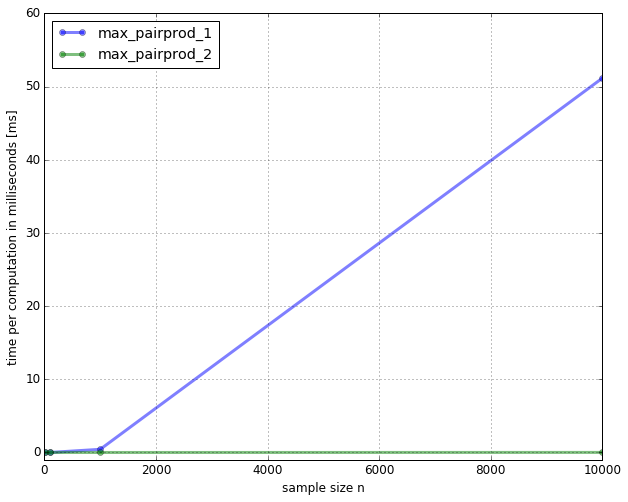

In [21]:
plot_timing()